# 2.1 Scatter Plot #

### Step 1: Import data ###

In [1]:
import pandas as pd
import numpy as np

# Import the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Step 2: Visualize the data. ###

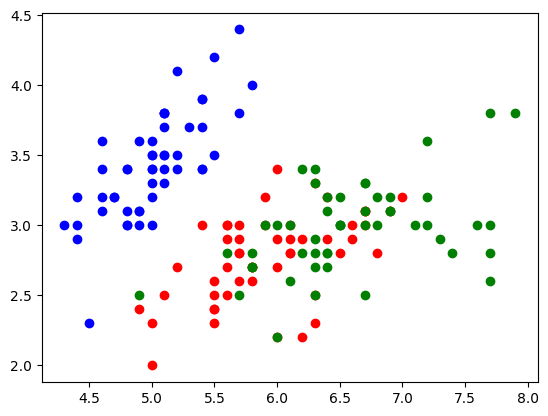

In [2]:
import matplotlib.pyplot as plt
# Sepal length corresponds to the x axis. 
x_index = 0

# Sepal width corresponds to the y axis.
y_index = 1
# Set the dataset color. Three colors such as blue, red, and green are set to indicate the three dataset types.
colors = ['blue', 'red', 'green']

# Use the zip function to package the Iris type and color into a tuple
# Visualize the three data types using the for... in... loop statement.
for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target == label, x_index], iris.data[iris.target == label, y_index], label=iris.target_names[label], c=color)

# 2.2 Classification Model-based Outlier Detection #

### Step 1: Import the dataset ###

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

# Name the X independent variable as dfx, and Y categorical variable as dfy
dfx = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dfx

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
dfy = pd.DataFrame(data=iris.target)
dfy

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Step 2: Generate the test set. ###

In [7]:
x_test = pd.DataFrame({"sepal length (cm)": [5.6, 4.9],
                       "sepal width (cm)": [2.5, 3],
                       "petal length (cm)": [4.5, 1.4],
                       "petal width (cm)": [0.2,2.1]})
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.6,2.5,4.5,0.2
1,4.9,3.0,1.4,2.1


### Step 3: Build a DecisionTreeClassifier model ###

In [8]:
# Import DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier
modelcart = DecisionTreeClassifier()
modelcart.fit(dfx, dfy)

DecisionTreeClassifier()

### Step 4: Check whether the values of A and B are outliers ###

In [10]:
predicted = modelcart.predict(x_test)
predicted

array([1, 0])

### Result Verification ###

The task results are verified in step 4, and the outliers are detected successfully. According to the decision tree model, A should be category 1. (In the test set, A is category 1.) And B should be category 0. (In the test set, B is category 2.) Therefore, B is an outlier.

# 2.3 Three-sigma Rule #

### Step 1: Import the dataset ###

In [11]:
# Select the first dimension data sepal length (cm), and name it the X dataset.
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,1]
X

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

### Step 2: Calculate the mean of the dataset. ###

In [14]:
import numpy as np
mean= np.mean(X)
mean

3.0573333333333337

### Step 3: Calculate the standard deviation and three standard deviations. ###

In [15]:
standard = np.std(X)
print(standard)

# Calculate the three standard deviations.
b = 3*standard
print(b)

0.4344109677354946
1.3032329032064838


### Step 4: Calculate the absolute value of the deviation between the X dataset and the mean ###

In [16]:
a = abs(X-mean)
a

array([0.44266667, 0.05733333, 0.14266667, 0.04266667, 0.54266667,
       0.84266667, 0.34266667, 0.34266667, 0.15733333, 0.04266667,
       0.64266667, 0.34266667, 0.05733333, 0.05733333, 0.94266667,
       1.34266667, 0.84266667, 0.44266667, 0.74266667, 0.74266667,
       0.34266667, 0.64266667, 0.54266667, 0.24266667, 0.34266667,
       0.05733333, 0.34266667, 0.44266667, 0.34266667, 0.14266667,
       0.04266667, 0.34266667, 1.04266667, 1.14266667, 0.04266667,
       0.14266667, 0.44266667, 0.54266667, 0.05733333, 0.34266667,
       0.44266667, 0.75733333, 0.14266667, 0.44266667, 0.74266667,
       0.05733333, 0.74266667, 0.14266667, 0.64266667, 0.24266667,
       0.14266667, 0.14266667, 0.04266667, 0.75733333, 0.25733333,
       0.25733333, 0.24266667, 0.65733333, 0.15733333, 0.35733333,
       1.05733333, 0.05733333, 0.85733333, 0.15733333, 0.15733333,
       0.04266667, 0.05733333, 0.35733333, 0.85733333, 0.55733333,
       0.14266667, 0.25733333, 0.55733333, 0.25733333, 0.15733

### Step 5: Determine the outlier ###

In [17]:
# Use the for loop to compare the absolute value of the deviation of the X dataset with three standard deviatitons.
for i in range(1,150):
    if a[i] > b:
        print('Outlier:', a[i])
        print('Position of the outlier:', i)

Outlier: 1.3426666666666667
Position of the outlier: 15


# 2.4 Box Plot Analysis #